# Basic Example - Robust Autoencoder

*Review Date: 10-05-2018

* Reviewed functions and behavior over sunspot time series.
* Nextflix Tests


In this notebook I only make test of Robust Autoencoder.

In [1]:
%matplotlib inline

In [2]:
%cd ..

/home/dlegorreta/Documentos/RAD


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
plt.rcParams['figure.figsize'] = 15, 10

In [6]:
#Sunspot Data
sunspots=pd.read_table("../RAD/data/sunspots.txt",header=None)

In [7]:
sunspots.columns=['Index','Values']
sunspots.head()

,Index,Values
0,0,58.0
1,1,62.6
2,2,70.0
3,3,55.7
4,4,85.0


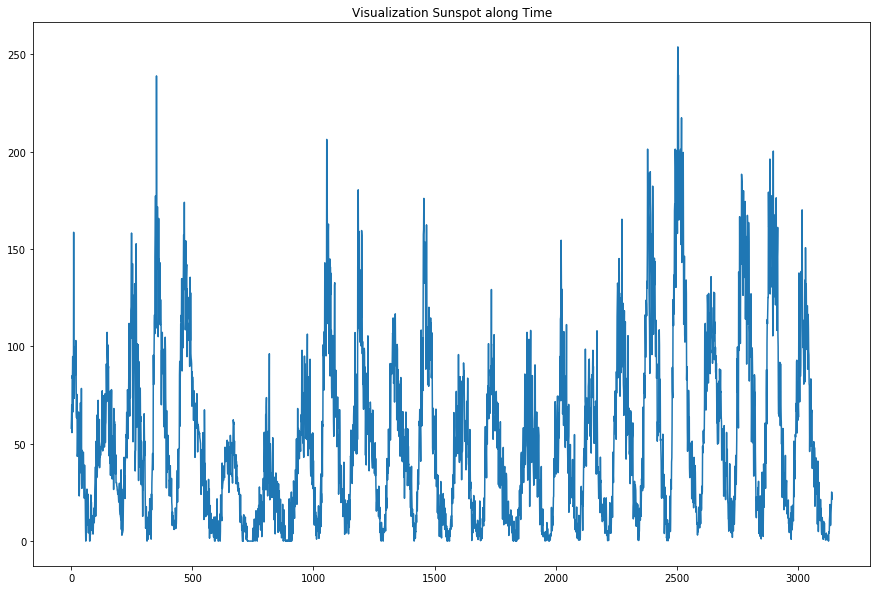

In [8]:
sunspots.Values.plot(title='Visualization Sunspot along Time')

In [9]:
#Main Function
from models import anomaly_detection as ad

In [10]:
# Algorithm over Time Series Data
Mod1=ad.AnomalyDetection_AUTOENCODER(forcediff=True,scale = True,verbose=True,layers=[7,64,64,7],lamda=0.07,batch_size=12).fit(X=sunspots.Values)

Time Series, frequency=7 and Num Periods= 449.
..........Start Process..........
shrink parameter: 0.01781904886676274
X shape:  (449, 7)
L shape:  (449, 7)
S shape:  (449, 7)
mu:  3.9283802700922275
XFnorm:  25.41149387791412
Out iteration:  0
 iteration : 0 , cost: 1.2942463
 iteration : 20 , cost: 0.004185303
 iteration : 40 , cost: 0.0038522833
 iteration : 60 , cost: 0.0022404639
 iteration : 80 , cost: 0.001887304
 iteration : 100 , cost: 0.001953537
c1:  0.028958353322562552
c2:  1.979924518195857
Out iteration:  1
 iteration : 0 , cost: 0.0017448447
 iteration : 20 , cost: 0.0015228525
 iteration : 40 , cost: 0.0014724622
 iteration : 60 , cost: 0.0015350729
 iteration : 80 , cost: 0.0015759728
 iteration : 100 , cost: 0.0015990395
c1:  0.02672074958817817
c2:  0.034832388634319804
Out iteration:  2
 iteration : 0 , cost: 0.0016457438
 iteration : 20 , cost: 0.0016171258
 iteration : 40 , cost: 0.0015654936
 iteration : 60 , cost: 0.0015344019
 iteration : 80 , cost: 0.00156805

In [11]:
L=Mod1.to_frame()

In [12]:
L.head()

,X_original,X_transform,L_transform,S_transform,Trans_X,Recover_X,S_Outliers,MAD_Outlier
0,58.0,1.583803e-15,-1.109073,0.0,14.741234,0.428653,0.0,0
1,62.6,4.600000e+00,4.450895,0.0,35.424446,0.467341,0.0,0
2,70.0,7.400000e+00,6.234772,0.0,6.653282,0.479246,0.0,0
3,55.7,-1.430000e+01,-16.963076,0.0,4.162703,0.334649,0.0,0
4,85.0,2.930000e+01,27.639151,0.0,8.129635,0.602757,0.0,0


Text(0.5, 1.0, 'Outcomes Visualization')

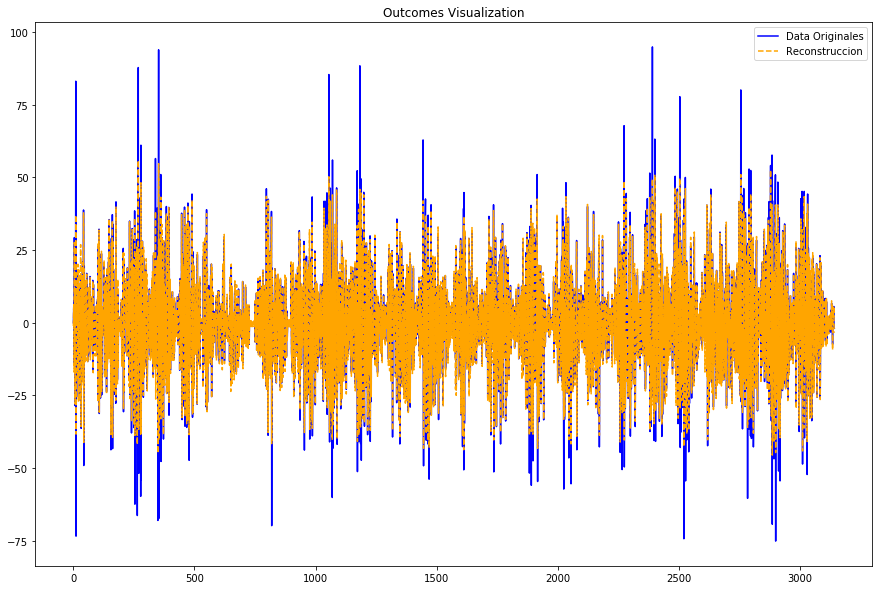

In [13]:
Original,=plt.plot(range(len(L.S_transform)),Mod1.X_transform,c='b',label='Data Originales')
Reconst,=plt.plot(range(len(L.S_transform)),Mod1.L_transform,c='orange',linestyle='--',label='Reconstruccion')
plt.legend(handles=[Original,Reconst])
plt.title("Outcomes Visualization")

Text(0.5, 1.0, 'Outcomes Visualization')

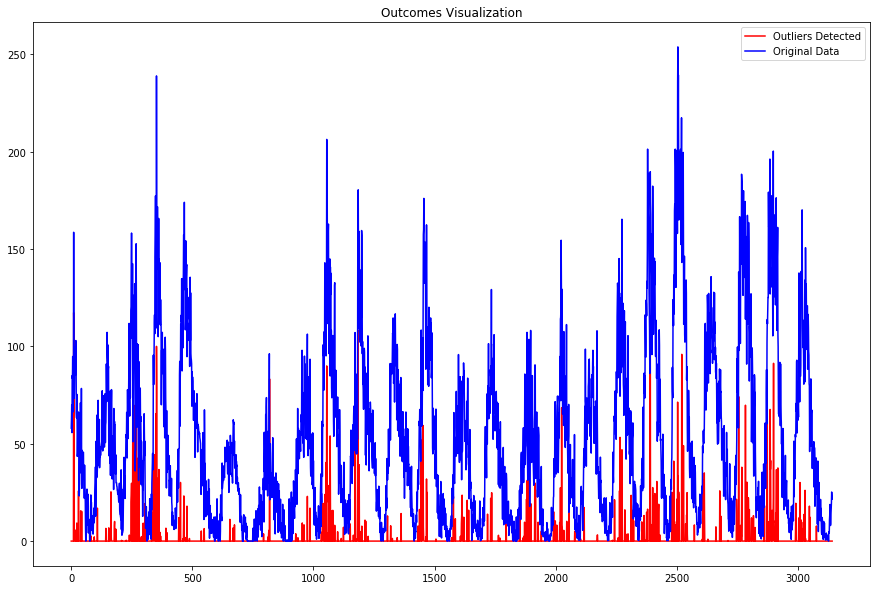

In [14]:
# Plot of the Outliers 

Outliers,=plt.plot(range(len(L.S_transform)),np.abs(L.S_Outliers)*Mod1.X_original.mean()*10, c='red',label='Outliers Detected')# Outliers detectados
DataOriginal,=plt.plot(range(len(L.S_transform)),L.X_original,'blue',label='Original Data')


plt.legend(handles=[Outliers,DataOriginal])
plt.title("Outcomes Visualization")

In [15]:
print("There are %d outliers of the total %d  observations."%(Mod1.num_outliers(),sunspots.shape[0]))

There are 229 outliers of the total 3143  observations.


In [16]:
#With MAD after Robust Autoencoder
L.MAD_Outlier.sum()

62

## Test de Netflix

Reference of Original Test: https://github.com/Netflix/Surus/tree/master/resources/R/RAD/tests

In [17]:
#Summary of outcomes
def Plot_Outliers(DF,scale=10):
    Outliers,=plt.plot(range(len(DF.S_transform)),np.abs(DF.S_transform)*DF.X_original.mean()*scale, c='red',label='Outliers')# Outliers detectados
    DataOriginal,=plt.plot(range(len(DF.S_transform)),DF.X_original,'blue',label='Original Data')
    plt.legend(handles=[Outliers,DataOriginal])
    plt.title("Outcomes Visualization")

In [18]:
#Serie Test 1 :signal with weekly periodicity.

Serie_Test1=np.sin((2*np.pi)/7*np.array(range(1,358)))

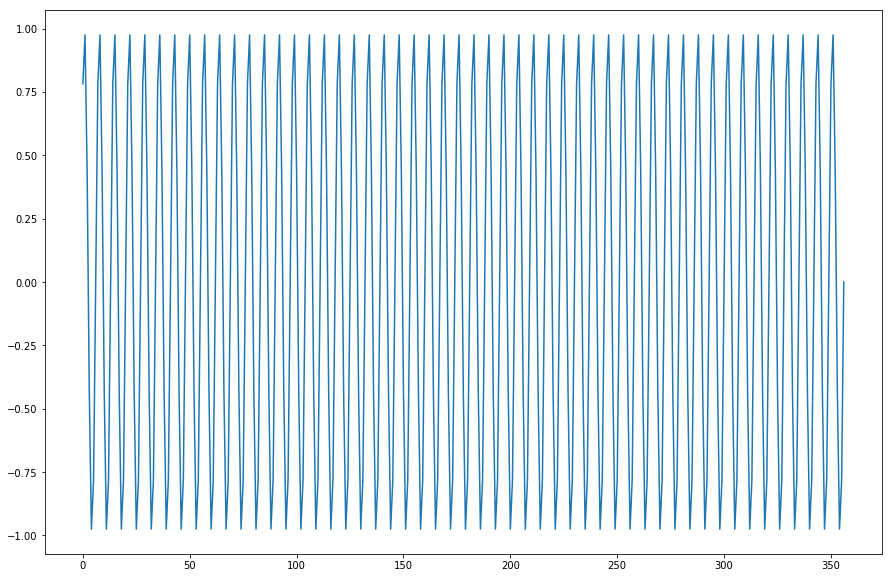

In [19]:
plt.plot(range(len(Serie_Test1)),Serie_Test1)

In [20]:
#Outliers days: 58,59 and 60.
Serie_Test1[58:61]=100

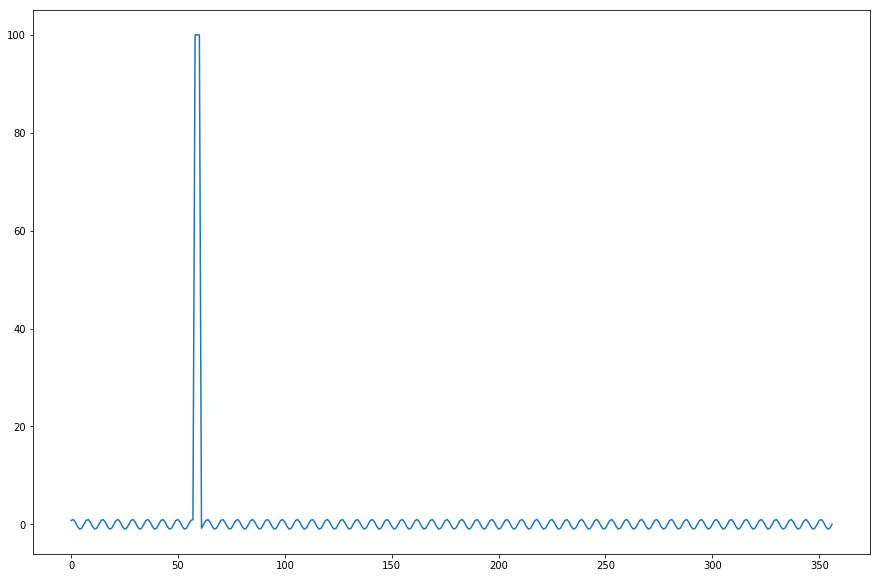

In [21]:
plt.plot(range(len(Serie_Test1)),Serie_Test1)

In [22]:
Mod2=ad.AnomalyDetection_AUTOENCODER(verbose=False,autodiff=True,layers=[7,64,64,7],lamda=.1).fit(X=pd.Series(Serie_Test1))

Time Series, frequency=7 and Num Periods= 51.
shrink parameter: 0.0019020780760555906


In [23]:
Mod2.to_frame().head()

,X_original,X_transform,L_transform,S_transform,Trans_X,Recover_X,S_Outliers,MAD_Outlier
0,0.781831,0.781831,0.787485,0.000000,99.911530,0.017454,0.000000,0
1,0.974928,0.974928,0.976717,0.000000,2.114964,0.019329,0.000000,0
2,0.433884,0.433884,1.805350,-0.011680,99.916298,0.027534,-0.011749,0
3,-0.433884,-0.433884,0.827662,-0.010592,73.958214,0.017852,-0.010648,0
4,-0.974928,-0.974928,0.601640,-0.013711,14.004549,0.015615,-0.013806,0


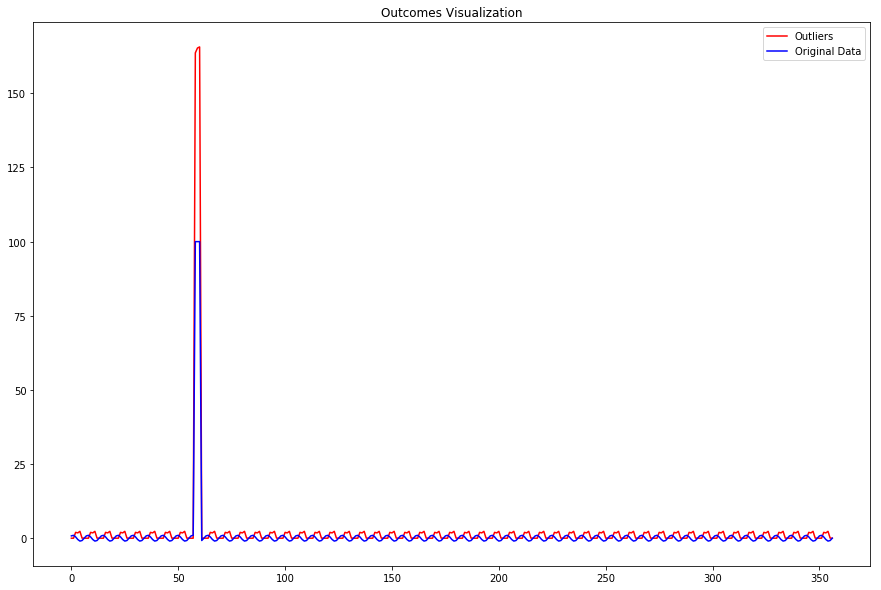

In [24]:
L1=Mod2.to_frame()
Plot_Outliers(L1,200)

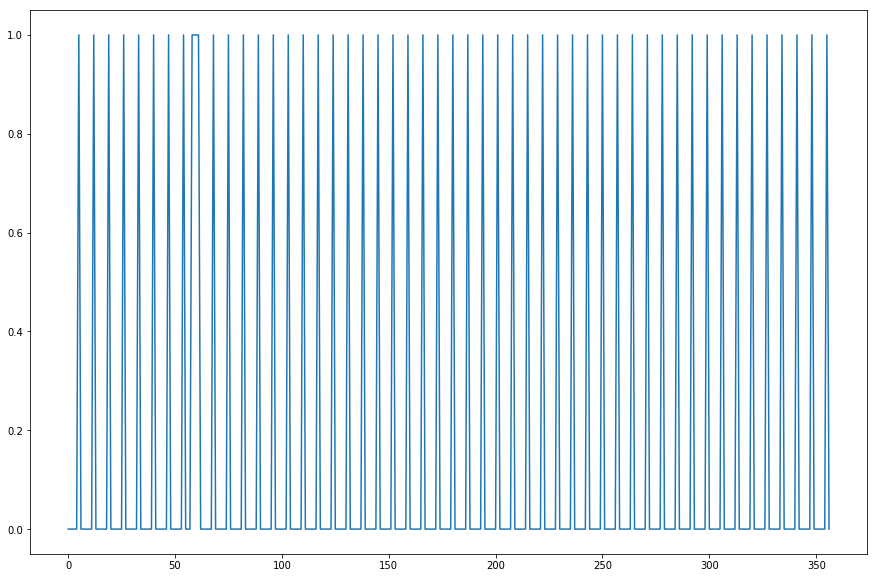

In [25]:
Mod2.to_frame().MAD_Outlier.plot()

## Test 2

Signal with weekly periodicity. There is a consistent increasing linear trend. An anomaly occurs on on days 69 and 70.

In [26]:
Serie_Test2=Serie_Test1+np.array(range(1,358))+np.random.rand(1,357)

In [27]:
Serie_Test2=Serie_Test2.reshape(-1,1).ravel()

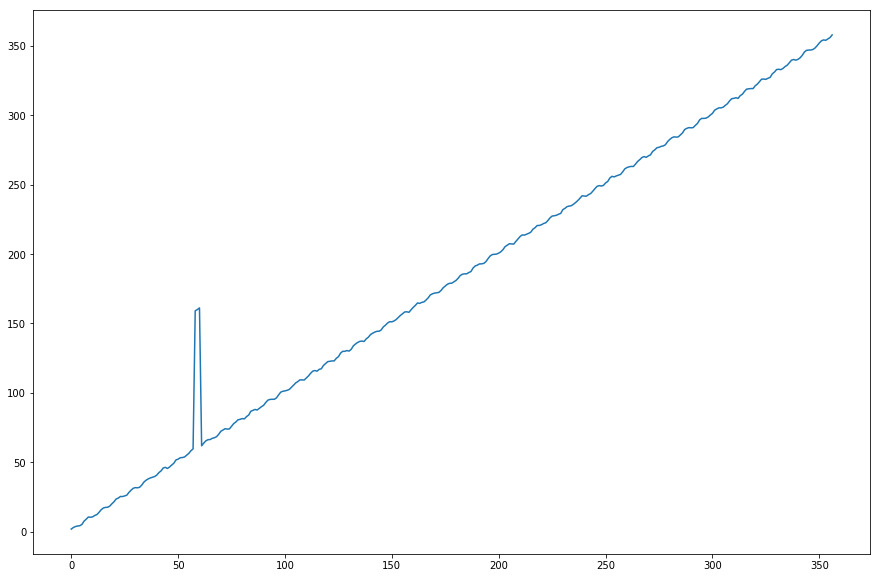

In [28]:
plt.plot(range(len(Serie_Test2)),Serie_Test2)

In [29]:
Mod2=ad.AnomalyDetection_AUTOENCODER(verbose=True,layers=[7,64,64,7],batch_size=12,lamda=.1).fit(X=pd.Series(Serie_Test2))

Time Series, frequency=7 and Num Periods= 51.
..........Start Process..........
shrink parameter: 0.02923393939820987
X shape:  (51, 7)
L shape:  (51, 7)
S shape:  (51, 7)
mu:  3.42068164806155
XFnorm:  9.559973464076622
Out iteration:  0
 iteration : 0 , cost: 1.4186783
 iteration : 20 , cost: 0.00051601767
 iteration : 40 , cost: 0.0001579613
 iteration : 60 , cost: 9.612829e-05
 iteration : 80 , cost: 5.1415514e-05
 iteration : 100 , cost: 3.1425032e-05
c1:  0.008481582192595984
c2:  1.8499819646174895
Out iteration:  1
 iteration : 0 , cost: 2.415094e-05
 iteration : 20 , cost: 2.0108424e-05
 iteration : 40 , cost: 1.9991037e-05
 iteration : 60 , cost: 2.0074014e-05
 iteration : 80 , cost: 2.029859e-05
 iteration : 100 , cost: 2.051319e-05
c1:  0.007481497932842548
c2:  0.00850151894303002
Out iteration:  2
 iteration : 0 , cost: 1.6998316e-05
 iteration : 20 , cost: 2.0284302e-05
 iteration : 40 , cost: 2.0878984e-05
 iteration : 60 , cost: 2.0164363e-05
 iteration : 80 , cost: 2.

In [30]:
Mod2.to_frame().head()

,X_original,X_transform,L_transform,S_transform,Trans_X,Recover_X,S_Outliers,MAD_Outlier
0,1.950443,1.554312e-15,1.665380,0.0,51.576008,0.508722,0.0,0
1,3.106524,1.156081e+00,1.198953,0.0,-74.367203,0.504596,0.0,0
2,3.803391,6.968674e-01,1.540717,0.0,52.103863,0.511318,0.0,0
3,4.160804,3.574130e-01,0.274594,0.0,71.140610,0.500561,0.0,0
4,4.382907,2.221030e-01,0.277141,0.0,77.224014,0.500611,0.0,0


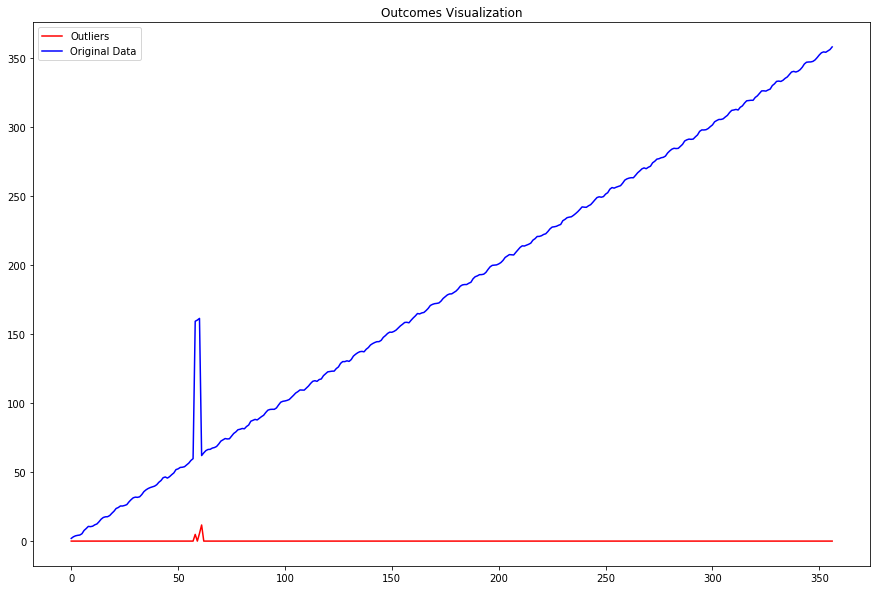

In [31]:
L2=Mod2.to_frame()
Plot_Outliers(L2,scale=1)

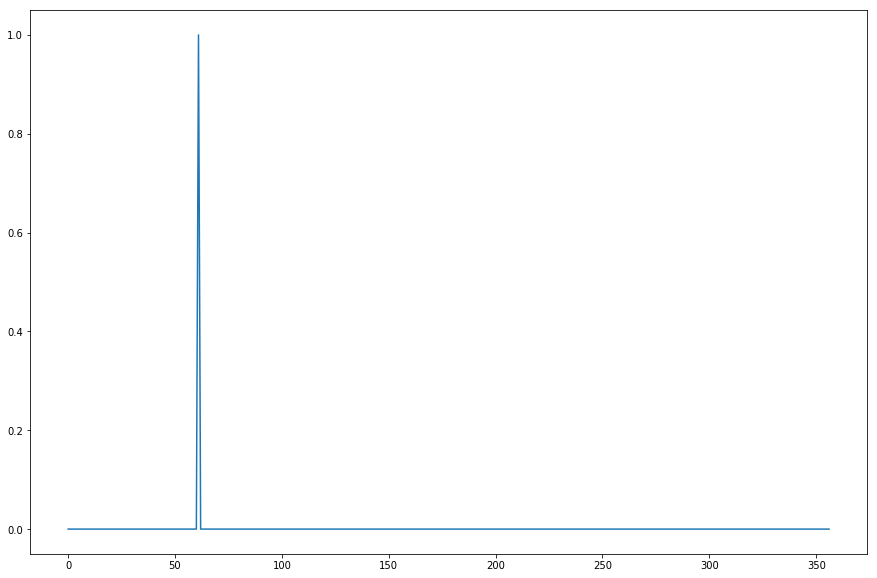

In [32]:
L2.MAD_Outlier.plot()

## Test 3 
Signal with no periodicity. The signal is the cumulative sum of the cumulative sum of random noise. An anomaly occurs on days 50, 51, and 52.

In [33]:
Serie_Test3=np.cumsum(np.random.normal(1,1,size=70))

In [34]:
#Outliers Controlados
Serie_Test3[50:53]=100

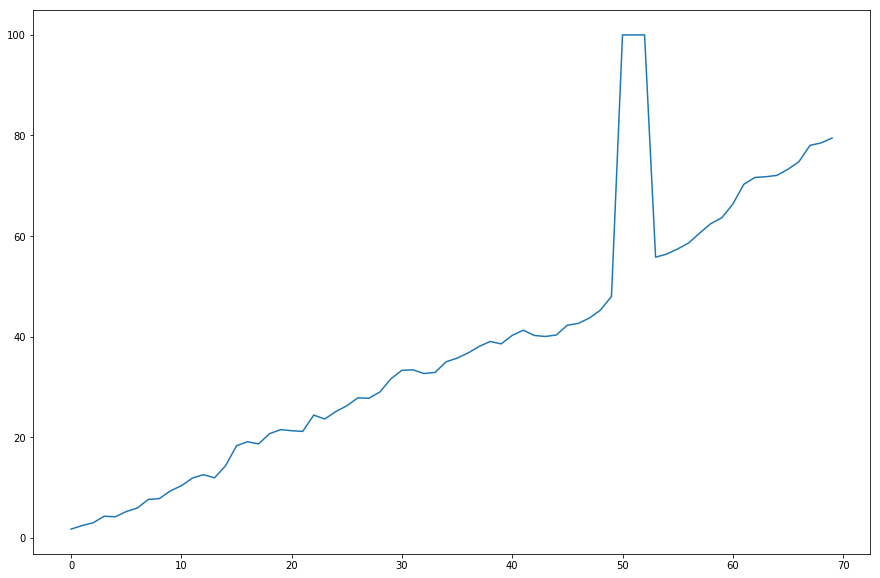

In [35]:
plt.plot(range(len(Serie_Test3)),Serie_Test3)

In [36]:
Mod2=ad.AnomalyDetection_AUTOENCODER(verbose=True,batch_size=6,layers=[7,64,64,7],lamda=.1).fit(X=pd.Series(Serie_Test3))

Time Series, frequency=7 and Num Periods= 10.
..........Start Process..........
shrink parameter: 0.030165523421629575
X shape:  (10, 7)
L shape:  (10, 7)
S shape:  (10, 7)
mu:  3.3150427593209617
XFnorm:  4.005201890213824
Out iteration:  0
 iteration : 0 , cost: 2.1353855
 iteration : 20 , cost: 0.6976346
 iteration : 40 , cost: 0.20685351
 iteration : 60 , cost: 0.20263512
 iteration : 80 , cost: 0.19691433
 iteration : 100 , cost: 0.18645921
c1:  0.03756029901396158
c2:  1.8227108580888247
Out iteration:  1
 iteration : 0 , cost: 0.010522135
 iteration : 20 , cost: 0.01015868
 iteration : 40 , cost: 0.0098346
 iteration : 60 , cost: 0.00945911
 iteration : 80 , cost: 0.009045586
 iteration : 100 , cost: 0.008610279
c1:  0.030603456790329792
c2:  0.028372103175785975
Out iteration:  2
 iteration : 0 , cost: 0.004595293
 iteration : 20 , cost: 0.004562115
 iteration : 40 , cost: 0.0044194693
 iteration : 60 , cost: 0.0042895167
 iteration : 80 , cost: 0.004155447
 iteration : 100 , c

In [37]:
Mod2.to_frame().head()

,X_original,X_transform,L_transform,S_transform,Trans_X,Recover_X,S_Outliers,MAD_Outlier
0,1.718831,-1.554312e-15,0.872455,0.0,35.991871,0.468978,0.0,0
1,2.414103,6.952721e-01,1.909039,0.0,5.583869,0.480400,0.0,0
2,2.977033,5.629302e-01,0.811427,0.0,49.026134,0.468468,0.0,0
3,4.277341,1.300307e+00,0.928594,0.0,0.584356,0.469231,0.0,0
4,4.166679,-1.106615e-01,0.606330,0.0,50.568665,0.464658,0.0,0


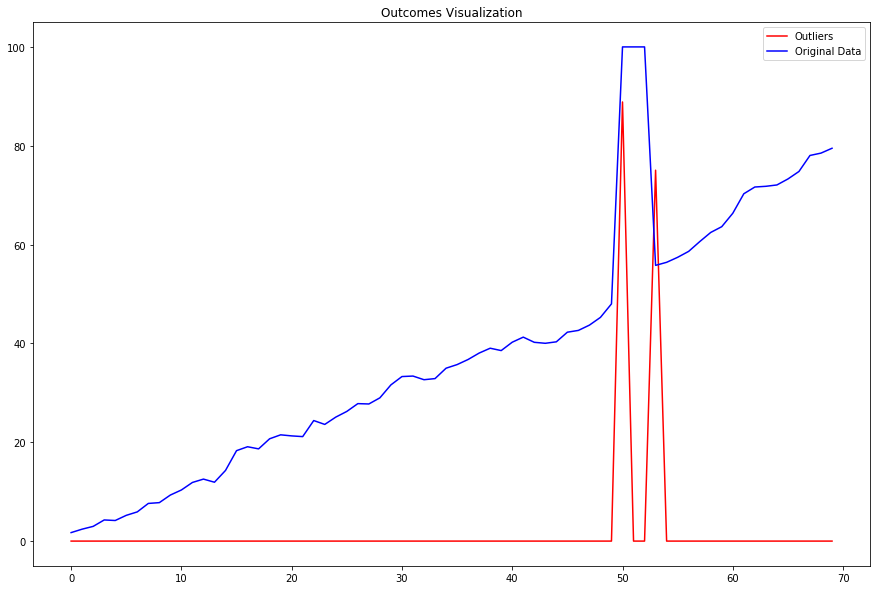

In [38]:
L3=Mod2.to_frame()
Plot_Outliers(L3,scale=5)

## Test 4 

Similar to test 3.


In [39]:
#Data
Serie_Test4=np.cumsum(np.random.normal(5,5,size=70))

In [40]:
#Outliers 
Serie_Test4[50:53]=100

In [41]:
Mod2=ad.AnomalyDetection_AUTOENCODER(verbose=True,forcediff=True,layers=[7,32,7,32,7],lamda=.1).fit(X=pd.Series(Serie_Test4))

Time Series, frequency=7 and Num Periods= 10.
..........Start Process..........
shrink parameter: 0.031579043211790996
X shape:  (10, 7)
L shape:  (10, 7)
S shape:  (10, 7)
mu:  3.166657055735684
XFnorm:  4.264570606812213
Out iteration:  0
 iteration : 0 , cost: 3.0005054
 iteration : 20 , cost: 2.0491672
 iteration : 40 , cost: 1.438465
 iteration : 60 , cost: 0.7515966
 iteration : 80 , cost: 0.31421712
 iteration : 100 , cost: 0.22231886
c1:  0.04014013075063728
c2:  1.777413152472312
Out iteration:  1
 iteration : 0 , cost: 0.01584612
 iteration : 20 , cost: 0.010116206
 iteration : 40 , cost: 0.009401538
 iteration : 60 , cost: 0.009351114
 iteration : 80 , cost: 0.009330521
 iteration : 100 , cost: 0.009318848
c1:  0.03519471003254549
c2:  0.0258944502651024
Out iteration:  2
 iteration : 0 , cost: 0.011127144
 iteration : 20 , cost: 0.007866194
 iteration : 40 , cost: 0.007658386
 iteration : 60 , cost: 0.0076233754
 iteration : 80 , cost: 0.0076143304
 iteration : 100 , cost: 

In [42]:
Mod2.to_frame().head()

,X_original,X_transform,L_transform,S_transform,Trans_X,Recover_X,S_Outliers,MAD_Outlier
0,3.990711,8.881784e-15,3.333805,0.0,-156.290604,0.498746,0.0,0
1,13.269846,9.279135e+00,5.208028,0.0,-91.941803,0.504223,0.0,0
2,17.598875,4.329029e+00,4.597461,0.0,-97.663101,0.502256,0.0,0
3,22.988247,5.389373e+00,3.761803,0.0,-11.930216,0.499632,0.0,0
4,29.504115,6.515868e+00,5.864100,0.0,-7.208949,0.506739,0.0,0


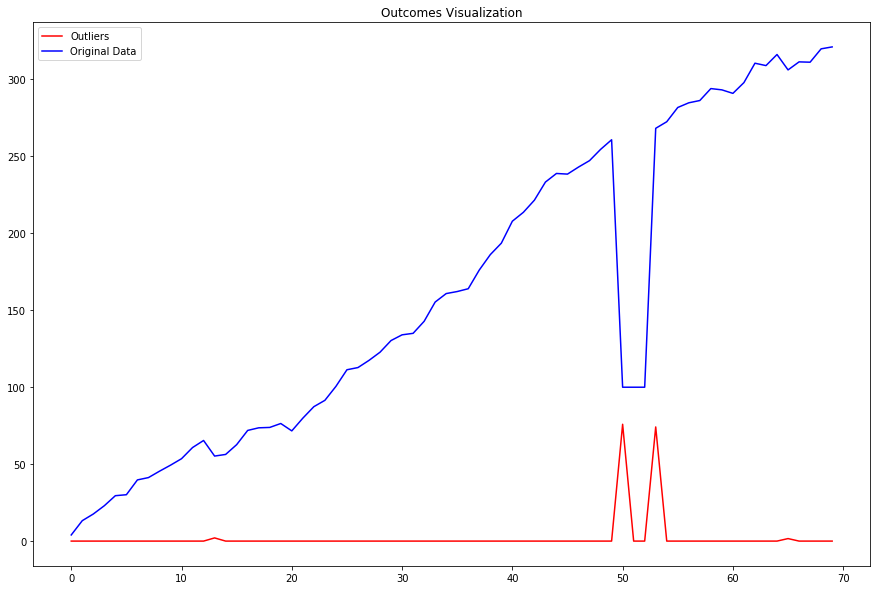

In [43]:
L4=Mod2.to_frame()
Plot_Outliers(L4,scale=1)

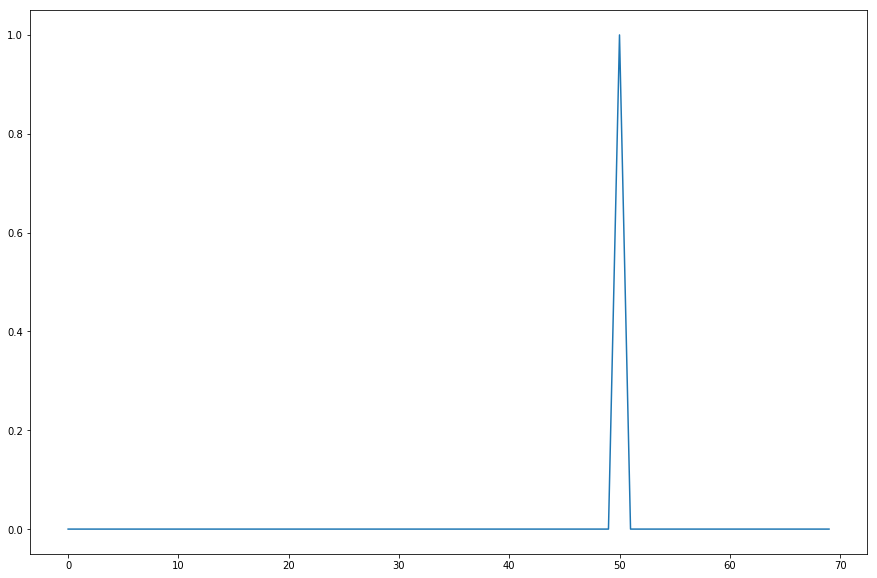

In [44]:
L4.MAD_Outlier.plot()

## Test 5


Outliers in differentes period, similar to the test 1.

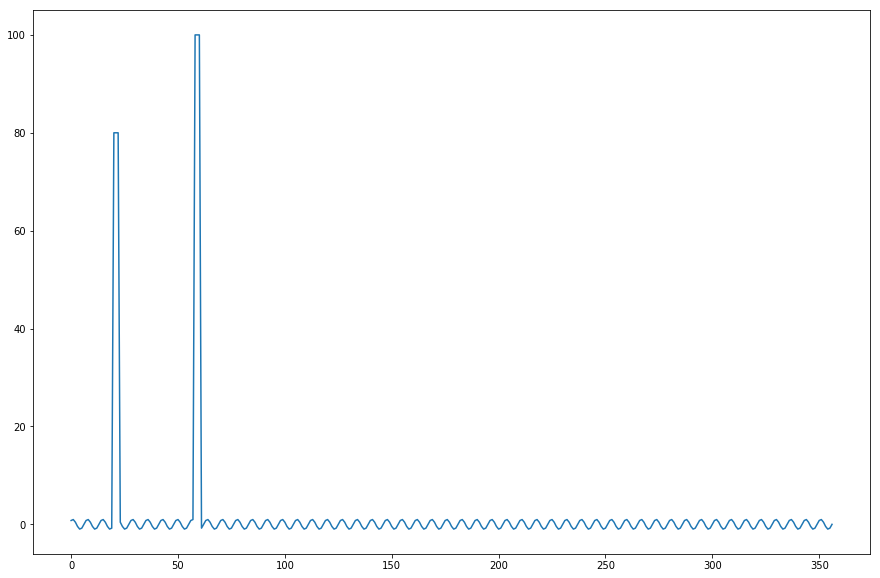

In [45]:
Serie_Test5=np.sin((2*np.pi)/7*np.array(range(1,358)))
#Outliers
Serie_Test5[58:61]=100
Serie_Test5[20:23]=80

plt.plot(range(len(Serie_Test5)),Serie_Test5)

In [46]:
Mod2=ad.AnomalyDetection_AUTOENCODER(verbose=True,autodiff=False,layers=[7,32,7,32,7],lamda=.11).fit(X=pd.Series(Serie_Test5))
Mod2.to_frame().head()

Time Series, frequency=7 and Num Periods= 51.
..........Start Process..........
shrink parameter: 0.0021783646554868656
X shape:  (51, 7)
L shape:  (51, 7)
S shape:  (51, 7)
mu:  50.49659602350413
XFnorm:  2.2313841329667032
Out iteration:  0
 iteration : 0 , cost: 3.5527537
 iteration : 20 , cost: 1.3572896
 iteration : 40 , cost: 0.07922851
 iteration : 60 , cost: 0.029779568
 iteration : 80 , cost: 0.017329246
 iteration : 100 , cost: 0.01205683
c1:  0.018445496486043933
c2:  7.101008446822655
Out iteration:  1
 iteration : 0 , cost: 4.4029977e-05
 iteration : 20 , cost: 1.500207e-05
 iteration : 40 , cost: 8.86218e-06
 iteration : 60 , cost: 5.358066e-06
 iteration : 80 , cost: 3.2757914e-06
 iteration : 100 , cost: 2.0342634e-06
c1:  0.018445496486043933
c2:  6.810966761984532e-17
Out iteration:  2
 iteration : 0 , cost: 4.8645314e-05
 iteration : 20 , cost: 1.6995804e-05
 iteration : 40 , cost: 8.048633e-06
 iteration : 60 , cost: 3.988965e-06
 iteration : 80 , cost: 2.0480404e-0

,X_original,X_transform,L_transform,S_transform,Trans_X,Recover_X,S_Outliers,MAD_Outlier
0,0.781831,0.781831,1.725864,-0.007171,5.698279,0.026747,-0.007197,0
1,0.974928,0.974928,3.253248,-0.020385,30.824116,0.041874,-0.020595,0
2,0.433884,0.433884,1.567321,-0.009047,64.958199,0.025177,-0.009088,0
3,-0.433884,-0.433884,1.097291,-0.012986,79.125359,0.020522,-0.013071,0
4,-0.974928,-0.974928,1.918967,-0.026481,71.001328,0.028660,-0.026838,0


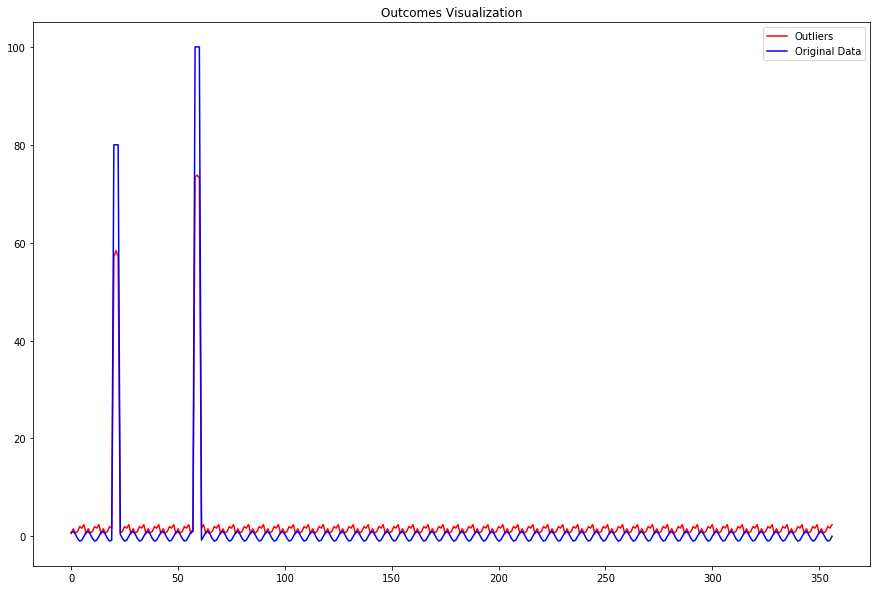

In [47]:
L5=Mod2.to_frame()
Plot_Outliers(L5,scale=50)

## Test 6

Similar to the test 3 + Test 4 with outlier in differentes period.

Text(0.5, 1.0, 'Time Serie')

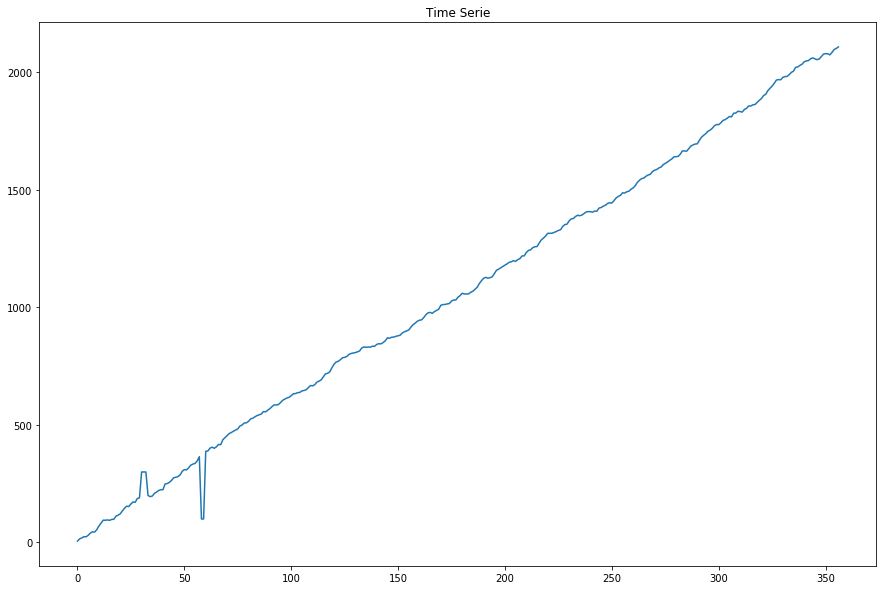

In [48]:
Serie_Test6=np.cumsum(np.random.normal(1,1,size=357)+np.random.normal(5,5,size=357))

#Outliers
Serie_Test6[58:60]=100
Serie_Test6[30:33]=300

plt.plot(range(len(Serie_Test6)),Serie_Test6)
plt.title("Time Serie")

In [49]:
Mod2=ad.AnomalyDetection_AUTOENCODER(verbose=True,layers=[7,32,7,32,7],batch_size=7,forcediff=True,lamda=0.1).fit(X=pd.Series(Serie_Test6))
Mod2.to_frame().head()

Time Series, frequency=7 and Num Periods= 51.
..........Start Process..........
shrink parameter: 0.02856090506086142
X shape:  (51, 7)
L shape:  (51, 7)
S shape:  (51, 7)
mu:  3.501289605035504
XFnorm:  9.291911611650871
Out iteration:  0
 iteration : 0 , cost: 0.9427558
 iteration : 20 , cost: 0.00089536025
 iteration : 40 , cost: 0.0006237504
 iteration : 60 , cost: 0.0006229275
 iteration : 80 , cost: 0.00062213856
 iteration : 100 , cost: 0.00062133593
c1:  0.020527270912823508
c2:  1.8705548917103385
Out iteration:  1
 iteration : 0 , cost: 0.0007041644
 iteration : 20 , cost: 0.0006910092
 iteration : 40 , cost: 0.00069156
 iteration : 60 , cost: 0.00069210946
 iteration : 80 , cost: 0.00069268997
 iteration : 100 , cost: 0.0006932924
c1:  0.018618111649386898
c2:  0.01514080350732853
Out iteration:  2
 iteration : 0 , cost: 0.0007036857
 iteration : 20 , cost: 0.000701481
 iteration : 40 , cost: 0.0007020737
 iteration : 60 , cost: 0.00070268085
 iteration : 80 , cost: 0.000703

,X_original,X_transform,L_transform,S_transform,Trans_X,Recover_X,S_Outliers,MAD_Outlier
0,5.965563,7.993606e-15,7.182092,0.0,-143.275391,0.492528,0.0,0
1,15.447972,9.482410e+00,5.837277,0.0,-15.354076,0.489842,0.0,0
2,19.354803,3.906831e+00,4.189413,0.0,-233.919647,0.486839,0.0,0
3,24.646058,5.291255e+00,7.097130,0.0,-226.217010,0.492304,0.0,0
4,24.137702,-5.083563e-01,5.809785,0.0,-262.621979,0.489953,0.0,0


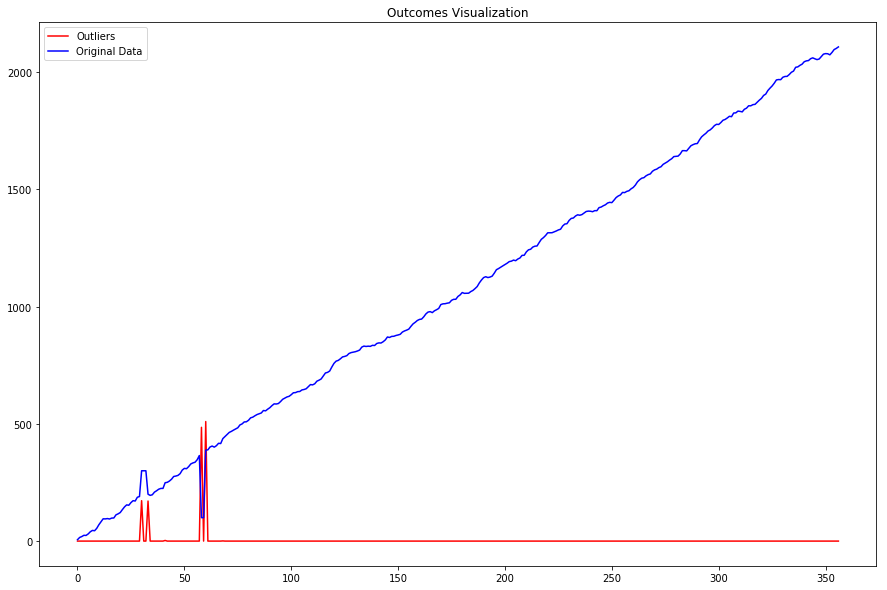

In [50]:
L6=Mod2.to_frame()
Plot_Outliers(L6,scale=1)

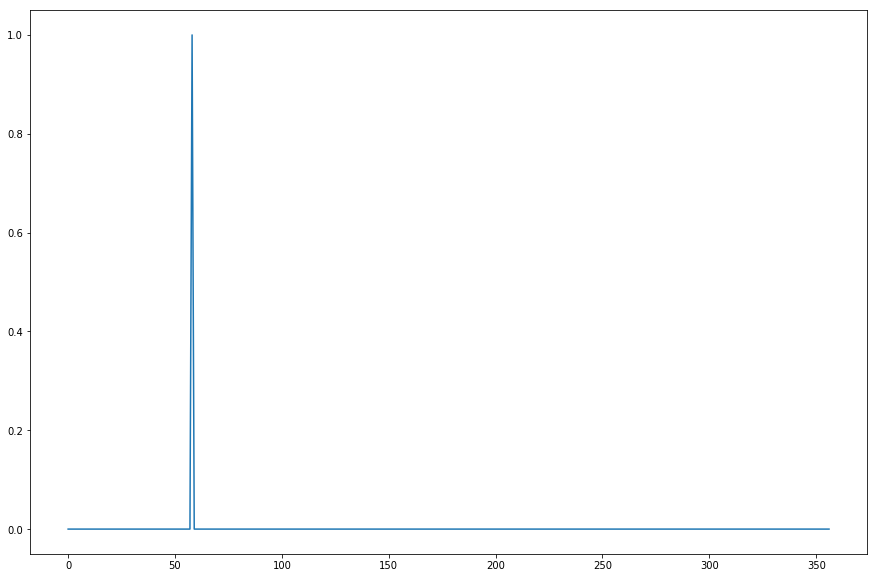

In [51]:
L6.MAD_Outlier.plot()

## Test 7 

Similar to the test 6, but with long time serie.

Text(0.5, 1.0, 'Time Serie')

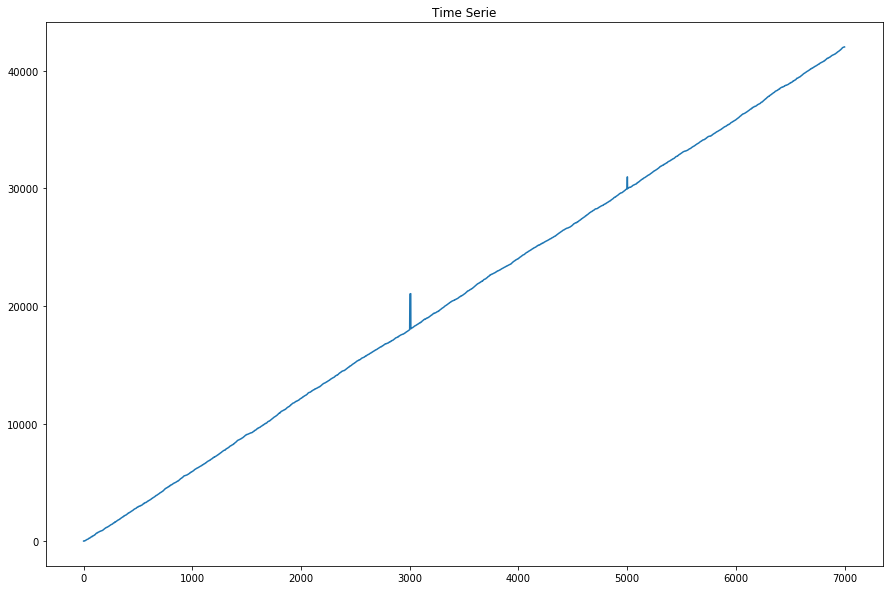

In [52]:
Serie_Test7=np.cumsum(np.random.normal(1,1,size=7000)+np.random.normal(5,5,size=7000))

#Outliers
Serie_Test7[5000:5003]=1000+Serie_Test7[5000:5003]
Serie_Test7[3000:3010]=3000+Serie_Test7[3000:3010]

plt.plot(range(len(Serie_Test7)),Serie_Test7)
plt.title("Time Serie")

In [53]:
%%time

Mod2=ad.AnomalyDetection_AUTOENCODER(verbose=True,batch_size=12,layers=[7,64,64,7],scale=True,lamda=.1).fit(X=pd.Series(Serie_Test7))
#Mod2.to_frame().head()

Time Series, frequency=7 and Num Periods= 1000.
..........Start Process..........
shrink parameter: 0.02853198130860838
X shape:  (1000, 7)
L shape:  (1000, 7)
S shape:  (1000, 7)
mu:  3.504838970640606
XFnorm:  41.7388521875462
Out iteration:  0
 iteration : 0 , cost: 0.5017255
 iteration : 20 , cost: 3.7181686e-05
 iteration : 40 , cost: 4.9423445e-05
 iteration : 60 , cost: 4.499677e-05
 iteration : 80 , cost: 7.04128e-05
 iteration : 100 , cost: 2.5241672e-05
c1:  0.00563553551338122
c2:  1.870444174283112
Out iteration:  1
 iteration : 0 , cost: 2.2821867e-05
 iteration : 20 , cost: 4.2897576e-05
 iteration : 40 , cost: 4.0086972e-05
 iteration : 60 , cost: 3.9241993e-05
 iteration : 80 , cost: 3.8136615e-05
 iteration : 100 , cost: 3.7301492e-05
c1:  0.0046994807714576285
c2:  0.013577563058402202
Out iteration:  2
 iteration : 0 , cost: 3.4937075e-05
 iteration : 20 , cost: 4.141971e-05
 iteration : 40 , cost: 3.2226748e-05
 iteration : 60 , cost: 1.5719115e-05
 iteration : 80 ,

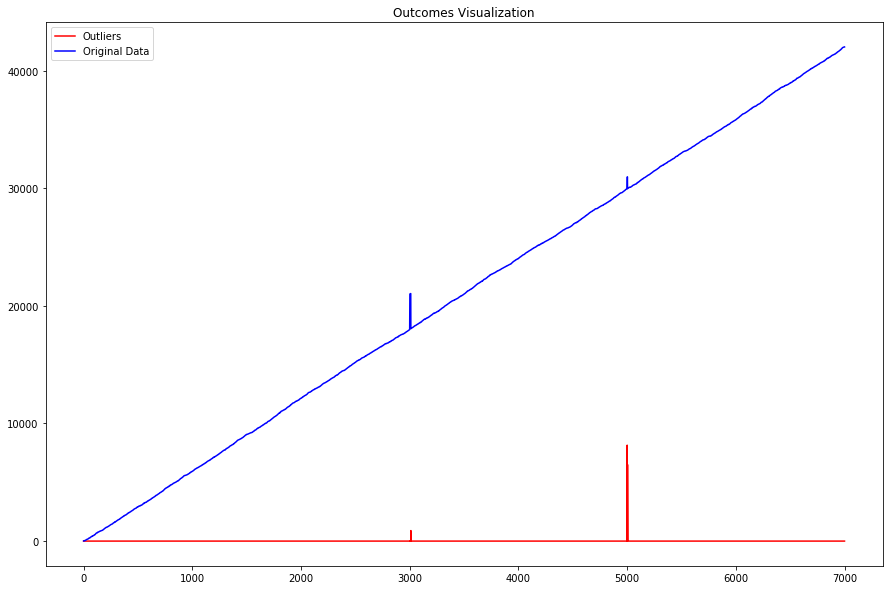

In [54]:
L6=Mod2.to_frame()
Plot_Outliers(L6,scale=5)